## 1. Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

## 2. Read CSV (features_3_sec.csv)

In [2]:
df = pd.read_csv("./GTZEN/features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


## 3. About the Dataset

In [3]:
df.shape

(9990, 60)

In [9]:
df.dtypes

length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean          

In [ ]:
df = df.drop(labels='filename', axis=1)

## 4. Understanding the Audio Files

In [6]:
audio_recor = "./GTZEN/genres_original/blues/blues.00009.wav"

data, sr = librosa.load(audio_recor)
# sr is sampling rate of y, here default for DVD output channel 45600 HZ
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [7]:
librosa.load(audio_recor, sr=45600)

(array([ 0.04592178,  0.06352827,  0.06494654, ..., -0.0435676 ,
        -0.03524505, -0.01756614], dtype=float32),
 45600)

In [8]:
Audio(data, rate=sr)

## 5. Visualizing Audio Files

### A. Raw Plotting Audio Files

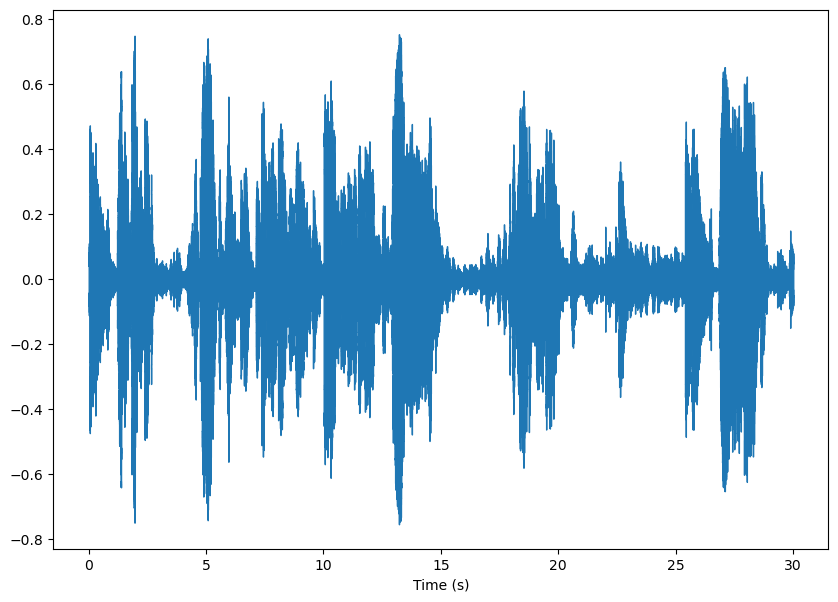

In [9]:
plt.figure(figsize=(10,7))
librosa.display.waveshow(data, sr=sr, x_axis="s", label="Amplitude Time plot of Audio file")

### B. Spectrograms
- representing signal loudness over time at various frequencies

C:\Users\DarkBlood\anaconda3\envs\tf_cuda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


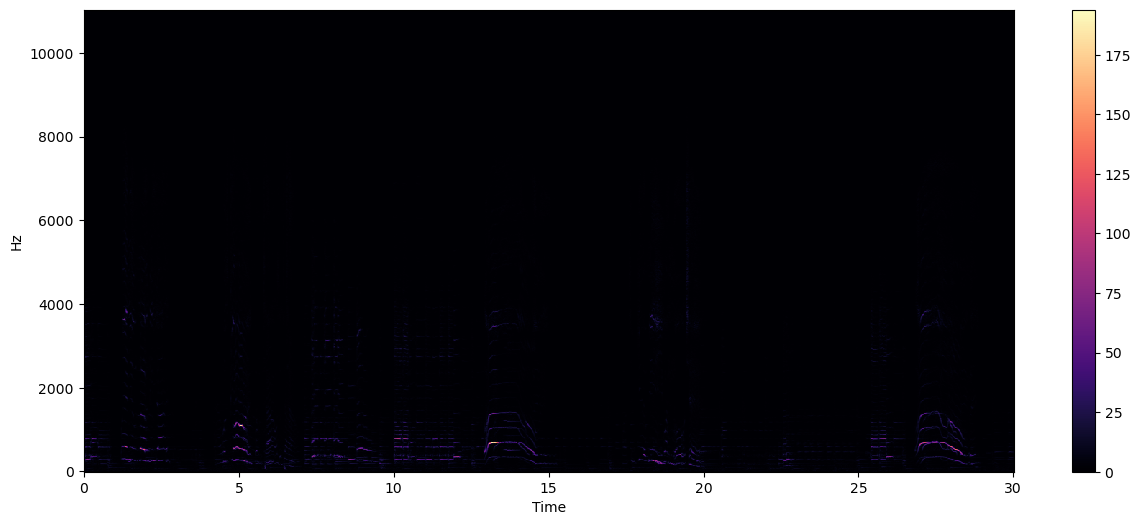

In [10]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(15,6))
librosa.display.specshow(stft, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()

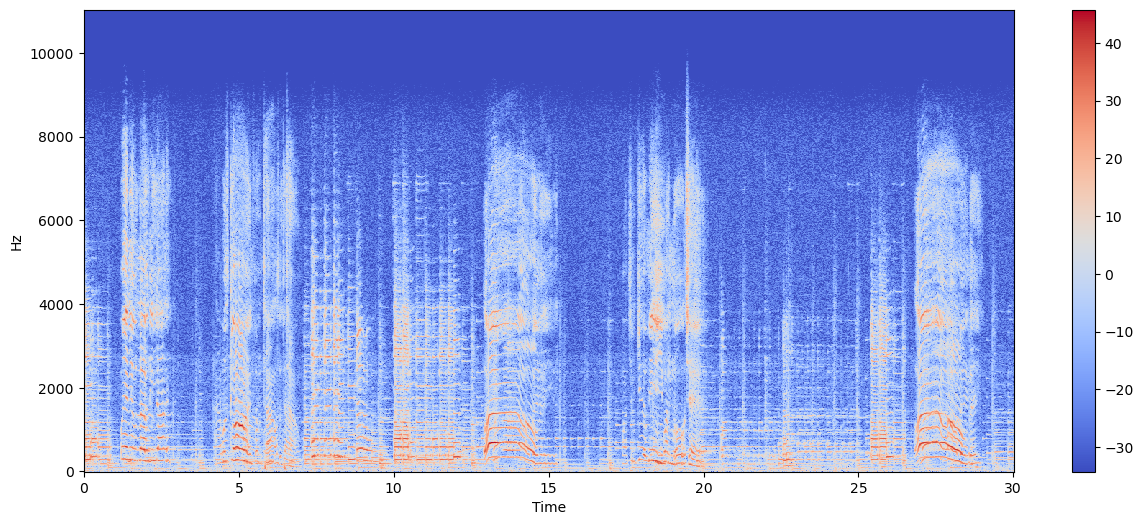

In [11]:
plt.figure(figsize=(15,6))
librosa.display.specshow(stft_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()

### C. Spectral Rolloff
- frequency below which a specified percentage of the total spectral energy lies

C:\Users\DarkBlood\AppData\Local\Temp\ipykernel_25552\477709931.py:2: FutureWarning: Pass y=[ 0.05647827  0.07399536  0.05327392 ... -0.03052734 -0.02955078
 -0.02741455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]


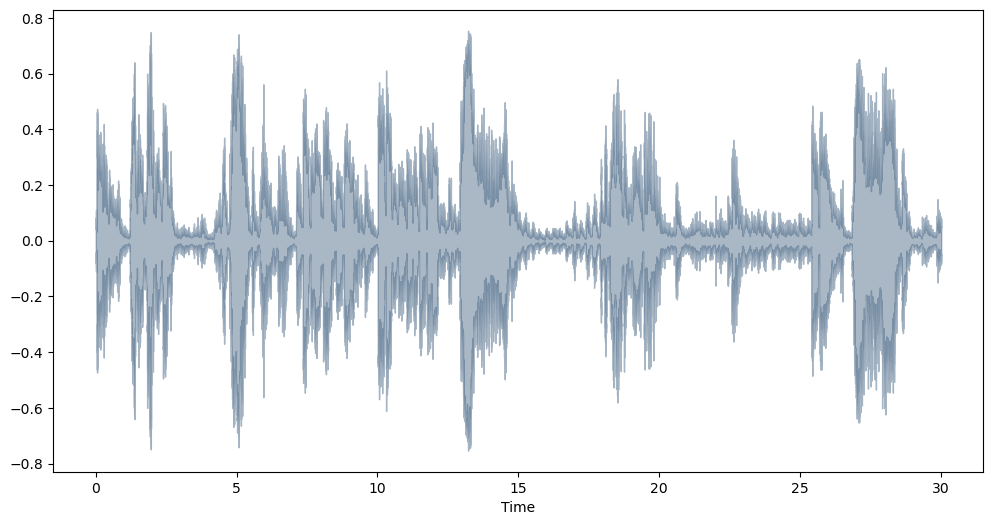

In [12]:
#from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12,6))
librosa.display.waveshow(data, sr=sr, alpha=0.4, color="#2B4F72")

### D. Chroma Feature
- Pitch can be meaningfully categorized
- Captures Harmonic and melodic features

C:\Users\DarkBlood\AppData\Local\Temp\ipykernel_25552\1943221876.py:2: FutureWarning: Pass y=[ 0.04647827  0.06399536  0.04327393 ... -0.04052734 -0.03955078
 -0.03741455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


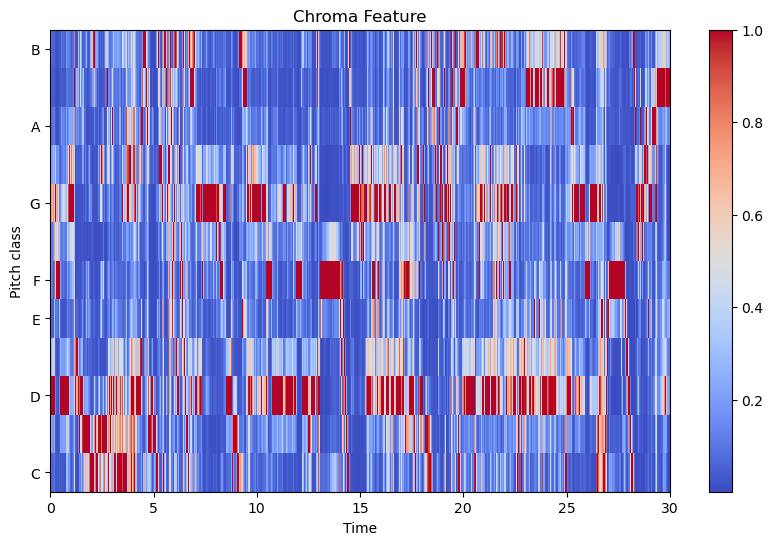

In [13]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(10,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis="chroma", cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Feature")
plt.show()

### E. Zero-Crossing Rate
- measure of the number of times in a given time that the amplitude of speech passes through a value of zero

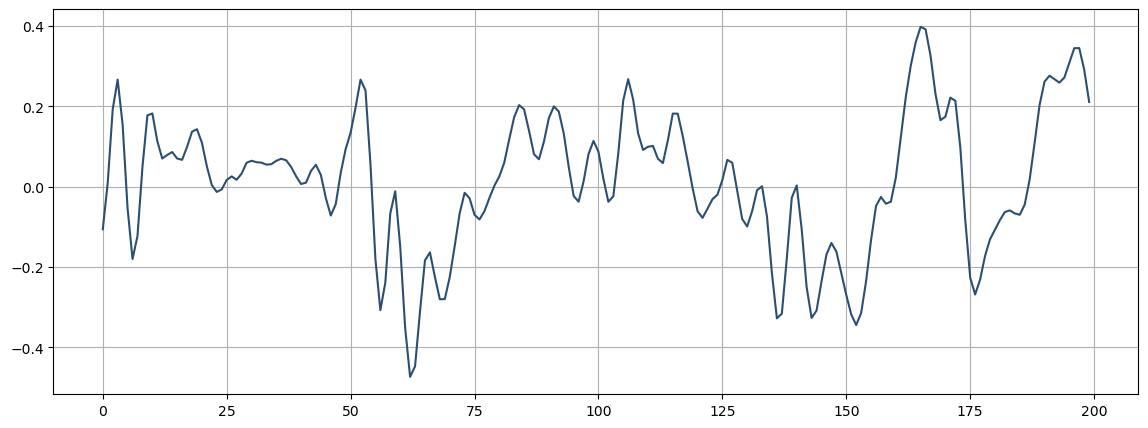

In [14]:
start = 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end], color="#2B4F72")
plt.grid()

In [15]:
zero_crossing_rate = librosa.zero_crossings(data[start: end], pad=False)
print("Zero_Crossing_Rate : ", sum(zero_crossing_rate))

Zero_Crossing_Rate :  23


## 4. Feature Extraction

In [16]:
class_list = df.iloc[:,-1]
convertor = LabelEncoder()

In [17]:
y = convertor.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [18]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:,:-1], dtype = float))

In [19]:
X

array([[ 0.        , -0.48780784,  0.64052047, ..., -0.51356204,
         0.12841417, -0.29178072],
       [ 0.        , -0.40314187,  0.13183473, ...,  1.01138445,
         1.27578001,  0.05642464],
       [ 0.        , -0.36169428,  0.7644909 , ..., -0.04624405,
         0.65390663, -0.52145798],
       ...,
       [ 0.        , -0.35433044,  0.42997426, ..., -0.15370124,
         0.11765485, -0.33882395],
       [ 0.        ,  0.0883611 , -0.00630133, ..., -0.72456977,
         0.30333409, -0.95893743],
       [ 0.        , -0.11321002,  0.19536324, ..., -0.37245283,
        -0.47495901, -0.55112155]])

#### My Steps for Feature Reduction (PCA)

In [20]:
from sklearn.decomposition import PCA
my_PCA = PCA(n_components=12, svd_solver="arpack")

In [21]:
X_PCA = my_PCA.fit(X)

In [22]:
X_PCA

PCA(n_components=12, svd_solver='arpack')

## 5. Preparing Training and Testing Data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33)

In [24]:
X_train

array([[ 0.        , -0.14914659,  1.4003906 , ...,  0.43480639,
        -0.11775054, -0.51543611],
       [ 0.        , -0.7258074 ,  1.25015641, ...,  2.03128264,
        -0.61242016,  1.15265583],
       [ 0.        ,  0.63082482, -0.68430904, ..., -0.37660497,
        -0.06849892,  0.03614982],
       ...,
       [ 0.        , -1.98299426, -0.61861096, ..., -0.92305741,
        -2.37489442, -0.24205467],
       [ 0.        ,  2.88928093, -4.46719532, ..., -0.99278108,
         1.0934291 , -0.82466723],
       [ 0.        ,  1.33065985, -0.04266684, ..., -0.54448585,
        -0.46412138, -0.53123048]])

In [25]:
Y_train[:5]

array([8, 7, 3, 0, 2])

## 6. Building Model
1. Multiclass SVM
2. K-Means Clustring
3. K-NN
4. CNN

### 1. Multiclass SVM

### 4. CNN

In [26]:
model_keras = keras.Sequential([
    keras.Input(shape=(X_train.shape[1]), name="InputLayer"),
    keras.layers.Dense(512, activation='relu'), keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='softmax')
])

print(model_keras.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [27]:
def train_model(model_keras, epochs, optimizer):
    model_keras.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics="accuracy")
    return model_keras.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=128)

In [28]:
def plotValidation(history):
    print("Validation Accuracy: ", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [29]:
model_history = train_model(model_keras, epochs=120, optimizer='adam')

Epoch 1/120
53/53 [==============================] - 4s 9ms/step - loss: 2.2159 - accuracy: 0.2619 - val_loss: 1.4877 - val_accuracy: 0.5220
Epoch 2/120
53/53 [==============================] - 0s 6ms/step - loss: 1.5407 - accuracy: 0.4835 - val_loss: 1.0646 - val_accuracy: 0.6600
Epoch 3/120
53/53 [==============================] - 0s 6ms/step - loss: 1.2606 - accuracy: 0.5884 - val_loss: 0.8868 - val_accuracy: 0.7161
Epoch 4/120
53/53 [==============================] - 0s 6ms/step - loss: 1.0584 - accuracy: 0.6604 - val_loss: 0.7709 - val_accuracy: 0.7504
Epoch 5/120
53/53 [==============================] - 0s 6ms/step - loss: 0.9442 - accuracy: 0.6930 - val_loss: 0.6921 - val_accuracy: 0.7743
Epoch 6/120
53/53 [==============================] - 0s 6ms/step - loss: 0.8255 - accuracy: 0.7405 - val_loss: 0.6468 - val_accuracy: 0.7834
Epoch 7/120
53/53 [==============================] - 0s 6ms/step - loss: 0.7588 - accuracy: 0.7532 - val_loss: 0.5771 - val_accuracy: 0.8089
Epoch 8/120
5

### Model Evaluation

Validation Accuracy:  0.9299362897872925


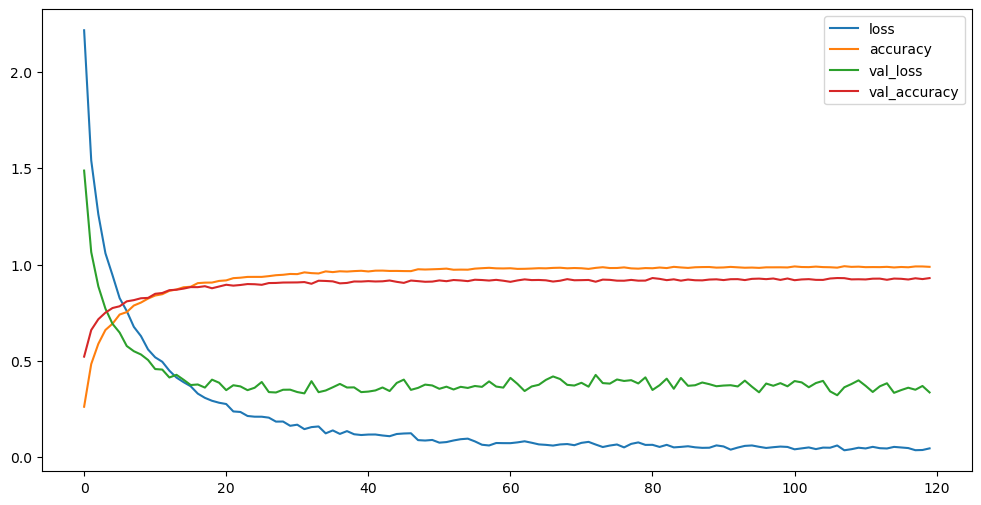

In [30]:
plotValidation(model_history)

In [31]:
test_loss, test_acc = model_keras.evaluate(X_test, Y_test, batch_size=128)
print("Test Loss: ", test_loss)
print("Best Test Accuracy: ", test_acc*100)

26/26 [==============================] - 0s 4ms/step - loss: 0.3362 - accuracy: 0.9296
Test Loss:  0.3362312912940979
Best Test Accuracy:  92.96330213546753
